# Analisis Sentimen Capres 2024

In [5]:
import pandas as pd
import re #Regular Expressions
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('anies.csv')
df.head()

,Unnamed: 0,created_at,id_str,full_text,quote_count,reply_count,retweet_count,favorite_count,lang,user_id_str,conversation_id_str,username,tweet_url
0,0,Fri Dec 15 04:04:44 +0000 2023,1.735511e+18,"@dedy_pram Pastilah, Prabowo Anies nggak punya...",0.0,0,0.0,0.0,in,797761417894051840,1.735147e+18,MarahIchsan,https://twitter.com/MarahIchsan/status/1735511...
1,1,Fri Dec 15 04:04:33 +0000 2023,1.735511e+18,Suasana pedesaan memang selalu menyenangkan......,0.0,0,0.0,0.0,in,936445409605459968,1.735511e+18,Agung_wiyo,https://twitter.com/Agung_wiyo/status/17355111...
2,2,Fri Dec 15 04:04:31 +0000 2023,1.735511e+18,Program anies hanyalah mengubah nama rumah sak...,0.0,0,0.0,0.0,in,768652236,1.735511e+18,Alfakton_i,https://twitter.com/Alfakton_i/status/17355111...
3,3,Fri Dec 15 04:04:27 +0000 2023,1.735511e+18,@kumparan @aniesbaswedan anies... BERBOHONG DA...,0.0,0,0.0,0.0,in,1710823909275410432,1.735146e+18,justtheway333,https://twitter.com/justtheway333/status/17355...
4,4,Fri Dec 15 04:04:26 +0000 2023,1.735511e+18,Tidak Bicara Sesuai Fakta! Anies Dengan Lantan...,0.0,0,1.0,1.0,in,1661757337554784264,1.735511e+18,singgihabdrchmn,https://twitter.com/singgihabdrchmn/status/173...


In [6]:
df = df[['full_text', 'username', 'created_at']]
df

,full_text,username,created_at
0,"@dedy_pram Pastilah, Prabowo Anies nggak punya...",MarahIchsan,Fri Dec 15 04:04:44 +0000 2023
1,Suasana pedesaan memang selalu menyenangkan......,Agung_wiyo,Fri Dec 15 04:04:33 +0000 2023
2,Program anies hanyalah mengubah nama rumah sak...,Alfakton_i,Fri Dec 15 04:04:31 +0000 2023
3,@kumparan @aniesbaswedan anies... BERBOHONG DA...,justtheway333,Fri Dec 15 04:04:27 +0000 2023
4,Tidak Bicara Sesuai Fakta! Anies Dengan Lantan...,singgihabdrchmn,Fri Dec 15 04:04:26 +0000 2023
...,...,...,...
510,Tiga untuk Indonesia lebih baik . tag || Gac...,TugimanPresiden,Fri Dec 15 03:36:13 +0000 2023
511,@herculep638 Makanya susah memahami apa yg dis...,Pribumituan,Fri Dec 15 03:36:13 +0000 2023
512,"Buat Pak Anies ,bukankah anda saat itu yg KD G...",Kacaback678910,Fri Dec 15 03:36:12 +0000 2023
513,"Anies Baswedan, sosok pemimpin yang memahami b...",YKasmono4,Fri Dec 15 03:36:12 +0000 2023


# 1. Cleaning Data

In [7]:
df.shape

(515, 3)

In [8]:
df = df.drop_duplicates(subset='full_text')
df.duplicated().sum()

np.int64(0)

In [9]:
df=df.dropna() #drop rows yang tidak N/A

In [10]:
df.isnull().sum()

full_text     0
username      0
created_at    0
dtype: int64

In [11]:
df.shape

(508, 3)

In [12]:
import re

def clean_twitter_text(text):
    # Remove mentions
    text = re.sub(r'@[A-Za-z0-9_]+', '', text)
    # Remove hashtags
    text = re.sub(r'#\w+', '', text)
    # Remove retweets
    text = re.sub(r'RT[\s]+', '', text)
    # Remove URLs
    text = re.sub(r'https?://\S+', '', text)
    # Remove non-alphanumeric characters
    text = re.sub(r'[^A-Za-z0-9\s]', '', text)
    # Remove extra whitespace and strip leading/trailing whitespace
    text = re.sub(r'\s+', ' ', text).strip()

    return text

df['full_text'] = df['full_text'].apply(clean_twitter_text)

In [13]:
df['full_text'] = df['full_text'].str.lower()

In [14]:
df

,full_text,username,created_at
0,pastilah prabowo anies nggak punya prestasi,MarahIchsan,Fri Dec 15 04:04:44 +0000 2023
1,suasana pedesaan memang selalu menyenangkan ud...,Agung_wiyo,Fri Dec 15 04:04:33 +0000 2023
2,program anies hanyalah mengubah nama rumah sak...,Alfakton_i,Fri Dec 15 04:04:31 +0000 2023
3,anies berbohong dan nipu tanpa rasa bersalah,justtheway333,Fri Dec 15 04:04:27 +0000 2023
4,tidak bicara sesuai fakta anies dengan lantang...,singgihabdrchmn,Fri Dec 15 04:04:26 +0000 2023
...,...,...,...
510,tiga untuk indonesia lebih baik tag gacoan dae...,TugimanPresiden,Fri Dec 15 03:36:13 +0000 2023
511,makanya susah memahami apa yg disampaikam anie...,Pribumituan,Fri Dec 15 03:36:13 +0000 2023
512,buat pak anies bukankah anda saat itu yg kd gu...,Kacaback678910,Fri Dec 15 03:36:12 +0000 2023
513,anies baswedan sosok pemimpin yang memahami ba...,YKasmono4,Fri Dec 15 03:36:12 +0000 2023


# 2. Preprocessing Data

### Normalisasi

In [15]:
norm = {
    "yg": "yang",
    "tdk": "tidak",
    "gk": "nggak",
    "blm": "belum",
    "sdh": "sudah",
    "jg": "juga",
    "bgt": "banget",
    "hrs": "harus",
    "dr": "dari",
    "dgn": "dengan",
    "krn": "karena",
    "aja": "saja",
    "lg": "lagi",
    "udh": "sudah",
    "nih": "ini",
    "tp": "tapi",
    "utk": "untuk",
    "sm": "sama",
    "kalo": "kalau",
    "dlm": "dalam",
    "knp": "kenapa",
    "spt": "seperti",
    "pls": "tolong",
    "makasih": "terima kasih",
    "thx": "terima kasih",
    "mlm": "malam",
    "pagi": "selamat pagi",
    "sore": "selamat sore",
    "siang": "selamat siang",
    "sy": "saya",
    "km": "kamu",
    "gw": "saya",
    "loe": "kamu",
    "bro": "saudara",
    "sis": "saudari",
    "ganjar": "",
    "prabowo": "",
    "nggak": "tidak"
}

def normalize_text(text):
    for word, initial in norm.items():
        text = text.replace(word, initial)
    return text

df['full_text'] = df['full_text'].apply(normalize_text)
df

,full_text,username,created_at
0,pastilah anies tidak punya prestasi,MarahIchsan,Fri Dec 15 04:04:44 +0000 2023
1,suasana pedesaan memang selalu menyenantidakan...,Agung_wiyo,Fri Dec 15 04:04:33 +0000 2023
2,program anies hanyalah mengubah nama rumah sak...,Alfakton_i,Fri Dec 15 04:04:31 +0000 2023
3,anies berbohong dan nipu tanpa rasa bersalah,justtheway333,Fri Dec 15 04:04:27 +0000 2023
4,tidak bicara sesuai fakta anies dengan lantang...,singgihabdrchmn,Fri Dec 15 04:04:26 +0000 2023
...,...,...,...
510,tiga untuk indonesia lebih baik tag gacoan dae...,TugimanPresiden,Fri Dec 15 03:36:13 +0000 2023
511,makanya susah memahami apa yang disampaikam an...,Pribumituan,Fri Dec 15 03:36:13 +0000 2023
512,buat pak anies bukankah anda saat itu yang kd ...,Kacaback678910,Fri Dec 15 03:36:12 +0000 2023
513,anies baswedan sosok pemimpin yang memahami ba...,YKasmono4,Fri Dec 15 03:36:12 +0000 2023


### Stopword

In [16]:
import Sastrawi
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory, StopWordRemover, ArrayDictionary
more_stop_words= ['tidak']

stopword = StopWordRemoverFactory().get_stop_words()
stopword.extend(more_stop_words)

new_array = ArrayDictionary(stopword)
stopword_new = StopWordRemover(new_array)

def remove_stopwords(str_text):
    return stopword_new.remove(str_text)

df['full_text'] = df['full_text'].apply(remove_stopwords)
df.head()


,full_text,username,created_at
0,pastilah anies punya prestasi,MarahIchsan,Fri Dec 15 04:04:44 +0000 2023
1,suasana pedesaan memang selalu menyenantidakan...,Agung_wiyo,Fri Dec 15 04:04:33 +0000 2023
2,program anies hanyalah mengubah nama rumah sak...,Alfakton_i,Fri Dec 15 04:04:31 +0000 2023
3,anies berbohong nipu rasa bersalah,justtheway333,Fri Dec 15 04:04:27 +0000 2023
4,bicara sesuai fakta anies lantang sebut lampun...,singgihabdrchmn,Fri Dec 15 04:04:26 +0000 2023


### Tokenize

In [17]:
tokenized = df['full_text'].apply(lambda x: x.split())
tokenized

0                     [pastilah, anies, punya, prestasi]
1      [suasana, pedesaan, memang, selalu, menyenanti...
2      [program, anies, hanyalah, mengubah, nama, rum...
3               [anies, berbohong, nipu, rasa, bersalah]
4      [bicara, sesuai, fakta, anies, lantang, sebut,...
                             ...                        
510    [tiga, indonesia, lebih, baik, tag, gacoan, da...
511    [makanya, susah, memahami, apa, disampaikam, a...
512    [buat, pak, anies, bukankah, saat, kd, gubernu...
513    [anies, baswedan, sosok, pemimpin, memahami, k...
514    [anies, baswedan, diharapkan, membawa, perubah...
Name: full_text, Length: 508, dtype: object

### Stemming

In [18]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

def stemming(text_cleaning):
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()
    do = []
    for w in text_cleaning:
        dt = stemmer.stem(w)
        do.append(dt)
    d_clean = []
    d_clean = " ". join(do)
    print(d_clean)
    return d_clean

tokenized = tokenized.apply(stemming)

tokenized.to_csv('Aniestokenized2.csv', index=False)

pasti anies punya prestasi
suasana desa memang selalu menyenantidakan udara segar rimbun tumbuh hijau sungai jin penuh ikanikan kecil besar tarik angin dieng gaco adidas semalem bukan ordal anies
program anies hanya ubah nama rumah sakit se indonesia wkwk juntidakook is coming olivia gaco daesang bangtan debut karina wonbin batter up 100m views
anies bohong nipu rasa salah
bicara sesuai fakta anies lantang sebut lampung punya alat pantau polusi udara gaco anies gempa daesang selamat pagi batter up 100m views pilih baik
sindir anies baswedan apbd paling besar kok mas anies gagal pimpin jakarta gaco anies gempa daesang selamat pagi batter up 100m views pilih baik
alesan jelas pak anies jelas jelas jelas nyamasih engga pahamdungu arti
wow mantap sekali ini arti saudara anies jadi presiden ri


KeyboardInterrupt: 

# 3. Translate 

In [19]:
!pip install translate

Defaulting to user installation because normal site-packages is not writeable


In [20]:
data =pd.read_csv('Aniestokenized2.csv', encoding='latin1')
data

,full_text
0,pasti anies punya prestasi
1,suasana desa memang selalu menyenantidakan uda...
2,program anies hanya ubah nama rumah sakit se i...
3,anies bohong nipu rasa salah
4,bicara sesuai fakta anies lantang sebut lampun...
...,...
503,tiga indonesia lebih baik tag gaco daesang oli...
504,makanya susah paham apa disampaikam anies basw...
505,buat pak anies bukankah saat kd gubernur dki a...
506,anies baswedan sosok pimpin paham pimpin bukan...


In [21]:
from translate import Translator

def translate_text(text):
    translator = Translator(from_lang="id", to_lang="en")
    translation = translator.translate(text)
    return translation

data['tweet_english'] = data['full_text'].apply(translate_text)
data.to_csv('Aniestranslated2.csv')

KeyboardInterrupt: 

# 4. Labeling

In [3]:
import pandas as pd

data = pd.read_csv('Aniestranslated2.csv', index_col=0) # dataset hanya 277 karena ada yang tidak bisa di translate
data

,full_text,tweet_english
0,pasti anies punya prestasi,anies must have achievements
1,suasana desa memang selalu menyenantidakan uda...,village atmosphere is always fun lush fresh ai...
2,program anies hanya ubah nama rumah sakit se i...,anies program only change the name of the hosp...
3,anies bohong nipu rasa salah,anies lie nipu rasa salah
4,bicara sesuai fakta anies lantang sebut lampun...,speak according to the facts anies loudly say ...
...,...,...
271,koleksi kendara capres miskin anies baswedan v...,a collection of vehicles for poor presidential...
272,mantap sih pak anies jauh membatidakan,steady sir anies far beratidakan
273,kata dukung anies cerdas2,words of support for intelligent anies2
274,karena abud anies mentidaklaim bangun banyak g...,because abud anies doesn't claim to build many...


In [4]:
!pip install tweet-preprocessor
!pip install textblob
!pip install wordcloud
!pip install nltk

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [5]:
import preprocessor as p
from textblob import TextBlob
import nltk
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /home/anfiniti/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /home/anfiniti/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [6]:
data_tweet = list(data['tweet_english'])
polaritas = 0

status = []
total_positif = total_negatif = total_netral = total = 0

for i, tweet in enumerate(data_tweet):
    analysis = TextBlob(tweet)
    polaritas += analysis.polarity

    if analysis.sentiment.polarity > 0.0:
        total_positif += 1
        status.append('Positif')
    elif analysis.sentiment.polarity < 0.0:
        total_negatif += 1
        status.append('Negatif')
    else:
        status.append('Netral')
        total_netral += 1

    total += 1

print(f'Hasil Analisis Data:\nPositif : {total_positif}\nNegatif : {total_negatif}\nNetral : {total_netral}\nTotal : {total}')
print(f'Total Data: {total}')

Hasil Analisis Data:
Positif : 144
Negatif : 46
Netral : 86
Total : 276
Total Data: 276


In [7]:
data['klasifikasi'] = status
data

,full_text,tweet_english,klasifikasi
0,pasti anies punya prestasi,anies must have achievements,Netral
1,suasana desa memang selalu menyenantidakan uda...,village atmosphere is always fun lush fresh ai...,Positif
2,program anies hanya ubah nama rumah sakit se i...,anies program only change the name of the hosp...,Netral
3,anies bohong nipu rasa salah,anies lie nipu rasa salah,Netral
4,bicara sesuai fakta anies lantang sebut lampun...,speak according to the facts anies loudly say ...,Positif
...,...,...,...
271,koleksi kendara capres miskin anies baswedan v...,a collection of vehicles for poor presidential...,Negatif
272,mantap sih pak anies jauh membatidakan,steady sir anies far beratidakan,Positif
273,kata dukung anies cerdas2,words of support for intelligent anies2,Positif
274,karena abud anies mentidaklaim bangun banyak g...,because abud anies doesn't claim to build many...,Positif


# 5. Visualisasi

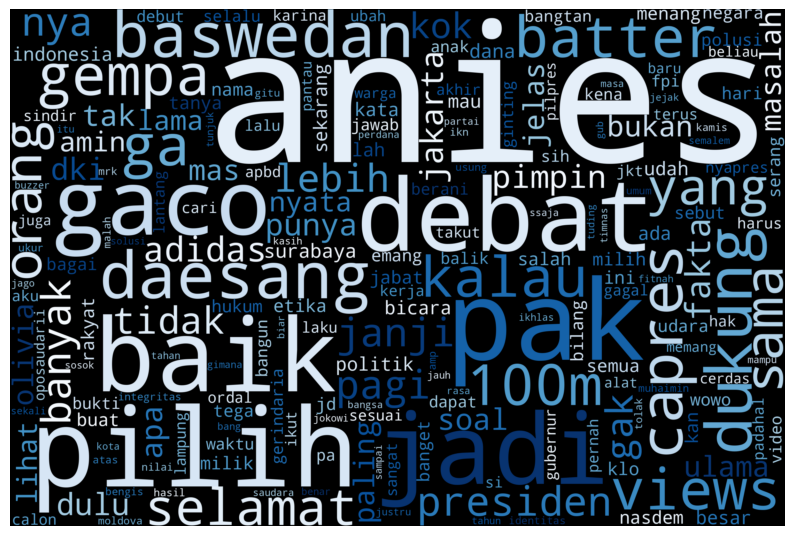

In [8]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Fungsi untuk memplot wordcloud
def plot_cloud(wordcloud):
    plt.figure(figsize=(10, 8))  # Atur ukuran plot
    plt.imshow(wordcloud, interpolation='bilinear')  # Tampilkan wordcloud
    plt.axis('off')  # Hilangkan sumbu

    # Simpan plot ke file
    plt.savefig('wordcloud_output.png', bbox_inches='tight')  # Simpan dengan nama file

    plt.show()  # Tampilkan plot

# Gabungkan semua kata dalam kolom 'full_text' menjadi satu string
all_words = ' '.join([tweets for tweets in data['full_text']])

# Buat wordcloud
wordcloud = WordCloud(
    width=3000,
    height=2000,
    random_state=3,
    background_color='black',
    colormap='Blues_r',
    collocations=False,
    stopwords=STOPWORDS  # Hindari kata umum yang ada di STOPWORDS
).generate(all_words)

# Plot wordcloud yang telah dibuat
plot_cloud(wordcloud)


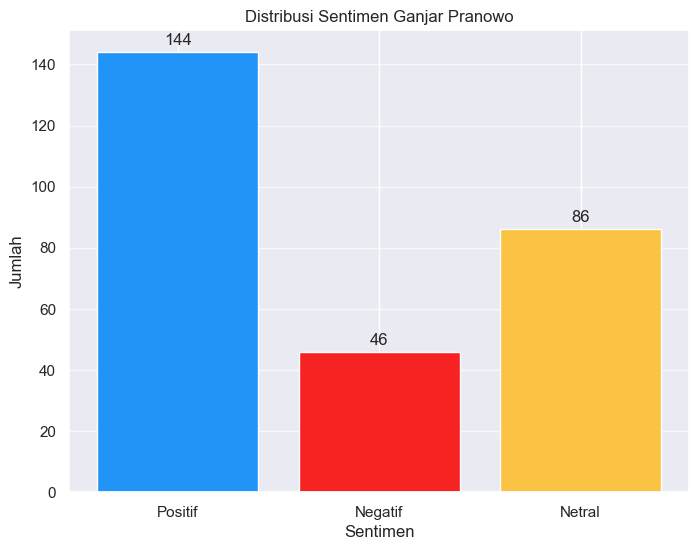

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

# Mengatur tema Seaborn
sns.set_theme()

# Label dan hitungan untuk grafik
labels = ['Positif', 'Negatif', 'Netral']  # Perbaikan label
counts = [total_positif, total_negatif, total_netral]

def show_bar_chart(labels, counts, title):
    fig, ax = plt.subplots(figsize=(8, 6))  # Membuat subplots
    bars = ax.bar(labels, counts, color=['#2394f7', '#f72323', '#fac343'])  # Membuat grafik batang

    # Menambahkan anotasi ke setiap batang
    for bar, count in zip(bars, counts):
        height = bar.get_height()  # Mendapatkan tinggi batang
        ax.annotate(f'{count}',  # Menampilkan hitungan
                    xy=(bar.get_x() + bar.get_width() / 2, height),  # Posisi anotasi
                    xytext=(0, 3),  # Offset anotasi
                    textcoords="offset points",
                    ha='center', va='bottom')

    # Menambahkan grid, label, dan judul
    ax.grid(axis='y', linestyle='-', alpha=0.7)
    ax.set_xlabel('Sentimen')
    ax.set_ylabel('Jumlah')
    ax.set_title(title)

    plt.show()  # Menampilkan plot

# Menampilkan diagram batang dengan data yang diberikan
show_bar_chart(labels, counts, "Distribusi Sentimen Ganjar Pranowo")


# 6. Klasifikasi Sentimen

In [9]:
data

,full_text,tweet_english,klasifikasi
0,pasti anies punya prestasi,anies must have achievements,Netral
1,suasana desa memang selalu menyenantidakan uda...,village atmosphere is always fun lush fresh ai...,Positif
2,program anies hanya ubah nama rumah sakit se i...,anies program only change the name of the hosp...,Netral
3,anies bohong nipu rasa salah,anies lie nipu rasa salah,Netral
4,bicara sesuai fakta anies lantang sebut lampun...,speak according to the facts anies loudly say ...,Positif
...,...,...,...
271,koleksi kendara capres miskin anies baswedan v...,a collection of vehicles for poor presidential...,Negatif
272,mantap sih pak anies jauh membatidakan,steady sir anies far beratidakan,Positif
273,kata dukung anies cerdas2,words of support for intelligent anies2,Positif
274,karena abud anies mentidaklaim bangun banyak g...,because abud anies doesn't claim to build many...,Positif


In [15]:
dataset = data.drop(['full_text'], axis=1, inplace=False)
dataset = [tuple(x) for x in dataset.to_records(index=False)]

In [16]:
import random

# List untuk menampung data sentimen
set_positif = []
set_negatif = []
set_netral = []

# Pemisahan dataset berdasarkan sentimen
for n in dataset:
    if n[1] == 'Positif':
        set_positif.append(n)
    elif n[1] == 'Negatif':
        set_negatif.append(n)
    else:
        set_netral.append(n)

# Mengambil sampel acak dari masing-masing set
set_positif = random.sample(set_positif, k=int(len(set_positif) / 2))
set_negatif = random.sample(set_negatif, k=int(len(set_negatif) / 2))
set_netral = random.sample(set_netral, k=int(len(set_netral) / 2))

# Menggabungkan data untuk training
train = set_positif + set_negatif + set_netral

# Membuat train_set yang baru
train_set = []
for n in train:
    train_set.append(n)

# Jika ingin menampilkan hasilnya
print(train_set)


[('manteb emang new minister klo lama kan corruption cadre nasdem skarenag support anies', 'Positif'), ('sarcasm anies baswedan apbd biggest kok mas anies fail pimpin jakarta gaco anies earthquake daesang good morning batter up 100m views choose well', 'Positif'), ('love of facts', 'Positif'), ('lottery china pools prediction December 15, 2023 am 9 7 6 3 0 cb 2d 7 amp 9 top 4d 3017079171039713 top 3d 971397379713139 top 2d 179719371371 shio ayam twins 11', 'Positif'), ('paragraph one has been explained the same pa anies himself watch geh video so that he understands the context of ape2 telen raw2 paragraph two names of the most sincere words ko stalked ko nyapres paragraph three ethics word brother awokwokwok mending ngaca first', 'Positif'), ("men's chino trousers cheap quality can cashback 40 shopee video anies gaco daesang surabaya earthquake let's see video shopee video", 'Positif'), ('dear many MSH support anies dateng mas baru di lampung kemaren bravely ya also like to say scared

In [19]:
from textblob.classifiers import NaiveBayesClassifier
cl = NaiveBayesClassifier(train_set)
print('Akurasi Testing:', cl.accuracy(train_set))

Akurasi Testing: 0.927536231884058


In [41]:
from textblob import TextBlob

# Misalkan data_tweet adalah list yang berisi tweet dalam bahasa Inggris
data_tweet = list(data['tweet_english'])  # Mengubah 'act_english' menjadi list dari data yang ada

# Inisialisasi variabel
polaritas = 0
status = []
total_positif = total_negatif = total_netral = total = 0

# Mengiterasi setiap tweet untuk klasifikasi
for i, tweet in enumerate(data_tweet):
    analysis = TextBlob(tweet, classifier=cl)  # Membuat analisis TextBlob pada tweet

    # Klasifikasi berdasarkan polaritas TextBlob
    if analysis.classify() == "Positif":
        total_positif += 1
    elif analysis.classify() == "Netral":
        total_netral += 1
    else:
        total_negatif += 1

    status.append(analysis.classify())  # Menambahkan hasil klasifikasi ke dalam list status
    total += 1

# Menampilkan hasil analisis
print(f'\nHasil Analisis Data:\nPositif = {total_positif}\nNetral = {total_netral}\nNegatif = {total_negatif}')
print(f'\nTotal Data: {total}')



Hasil Analisis Data:
Positif = 172
Netral = 89
Negatif = 15

Total Data: 276


In [53]:
print(len(status))
print(len(data['full_text']))


276
276


In [61]:
# Membuat DataFrame dari status dan langsung menambahkannya ke data
data['Klasifikasi Bayes'] = status
data

,full_text,tweet_english,klasifikasi,Klasifikasi Bayes
0,pasti anies punya prestasi,anies must have achievements,Netral,Netral
1,suasana desa memang selalu menyenantidakan uda...,village atmosphere is always fun lush fresh ai...,Positif,Positif
2,program anies hanya ubah nama rumah sakit se i...,anies program only change the name of the hosp...,Netral,Netral
3,anies bohong nipu rasa salah,anies lie nipu rasa salah,Netral,Netral
4,bicara sesuai fakta anies lantang sebut lampun...,speak according to the facts anies loudly say ...,Positif,Positif
...,...,...,...,...
271,koleksi kendara capres miskin anies baswedan v...,a collection of vehicles for poor presidential...,Negatif,Positif
272,mantap sih pak anies jauh membatidakan,steady sir anies far beratidakan,Positif,Positif
273,kata dukung anies cerdas2,words of support for intelligent anies2,Positif,Positif
274,karena abud anies mentidaklaim bangun banyak g...,because abud anies doesn't claim to build many...,Positif,Positif


In [60]:
data.to_csv('AniesBayes2.csv')

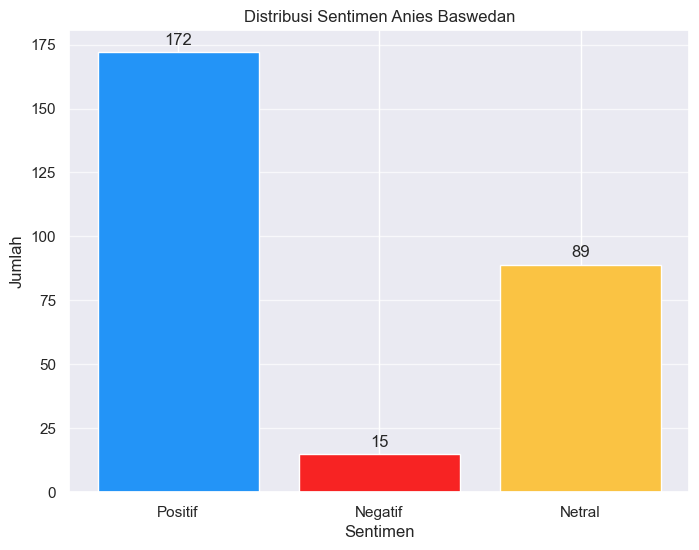

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set tema seaborn untuk tampilan yang lebih profesional
sns.set_theme()

# Label dan hitungan
labels = ['Positif', 'Negatif', 'Netral']
counts = [total_positif, total_negatif, total_netral]

def show_bar_chart(labels, counts, title):
    fig, ax = plt.subplots(figsize=(8, 6))
    bars = ax.bar(labels, counts, color=['#2394f7', '#f72323', '#fac343'])

    # Menambahkan keterangan presentase untuk setiap bar
    for bar, count in zip(bars, counts):
        height = bar.get_height()
        ax.annotate(f'{count}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

    # Menambahkan grid
    ax.grid(axis='y', linestyle='-', alpha=0.7)

    # Menambahkan label sumbu dan judul
    ax.set_xlabel('Sentimen')
    ax.set_ylabel('Jumlah')
    ax.set_title(title)

    plt.show()

# Menampilkan grafik batang
show_bar_chart(labels, counts, "Distribusi Sentimen Anies Baswedan")


In [2]:
data

NameError: name 'data' is not defined

In [72]:
data_eval= [tuple(x) for x in data.to_records(index=False)]

for n in data_eval:
    if len(n) >=4:
        if n[2] != n[3]:
            print(f'Text: {n[0]}\nClassifier: {n[2]}\nClassifier Bayes: {n[3]}\n')
    else:
        print('Tuple tidak memiliki cukup elemen')

Text: anies baswedan jawab tanya debat bukti nyata kerja sangat muas
Classifier: Negatif
Classifier Bayes: Positif

Text: itu anak anies emang cantik banget senyum
Classifier: Positif
Classifier Bayes: Netral

Text: lama masa jabat gubernur anies pimpin bagai proyek bangun sejahtera rakyat
Classifier: Negatif
Classifier Bayes: Positif

Text: 2019 anies jd gubernur ikut pilpres ada 2024 anies calon nasdem apa salah nasdem jeli negara butuh sosok anies rakyat ubah adil sosial seluruh rakyat indonesia
Classifier: Negatif
Classifier Bayes: Positif

Text: ordal anies profesional integritas
Classifier: Positif
Classifier Bayes: Netral

Text: anies baswedan muhaimin iskandar dong indonesia lebih baik
Classifier: Positif
Classifier Bayes: Netral

Text: udah rahasia umum lah ga usah tutup bagaimana anies menikamuati politik identitas dia betulbetul ambil untung
Classifier: Negatif
Classifier Bayes: Netral

Text: org cerdas paham apa sampai pak anies klo otak cetek males mikir nilai njelimet
Cla

In [5]:
data

,Unnamed: 0,full_text,tweet_english,klasifikasi,Klasifikasi Bayes
0,0,pasti anies punya prestasi,anies must have achievements,Netral,Netral
1,1,suasana desa memang selalu menyenantidakan uda...,village atmosphere is always fun lush fresh ai...,Positif,Positif
2,2,program anies hanya ubah nama rumah sakit se i...,anies program only change the name of the hosp...,Netral,Netral
3,3,anies bohong nipu rasa salah,anies lie nipu rasa salah,Netral,Netral
4,4,bicara sesuai fakta anies lantang sebut lampun...,speak according to the facts anies loudly say ...,Positif,Positif
...,...,...,...,...,...
271,271,koleksi kendara capres miskin anies baswedan v...,a collection of vehicles for poor presidential...,Negatif,Positif
272,272,mantap sih pak anies jauh membatidakan,steady sir anies far beratidakan,Positif,Positif
273,273,kata dukung anies cerdas2,words of support for intelligent anies2,Positif,Positif
274,274,karena abud anies mentidaklaim bangun banyak g...,because abud anies doesn't claim to build many...,Positif,Positif


# Wordcloud Klasifikasi Semua Sentimen 

In [1]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Fungsi untuk memplot wordcloud
def plot_cloud(wordcloud):
    plt.figure(figsize=(10, 8))  # Atur ukuran plot
    plt.imshow(wordcloud, interpolation='bilinear')  # Tampilkan wordcloud
    plt.axis('off')  # Hilangkan sumbu

    # Simpan plot ke file
    plt.savefig('wordcloud_output_Semua_Sentimen.png', bbox_inches='tight')  # Simpan dengan nama file

    plt.show()  # Tampilkan plot

# Gabungkan semua kata dalam kolom 'full_text' menjadi satu string
all_words = ' '.join([tweets for tweets in data['full_text']])

# Buat wordcloud
wordcloud = WordCloud(
    width=3000,
    height=2000,
    random_state=3,
    background_color='black',
    colormap='Blues_r',
    collocations=False,
    stopwords=STOPWORDS  # Hindari kata umum yang ada di STOPWORDS
).generate(all_words)

# Plot wordcloud yang telah dibuat
plot_cloud(wordcloud)


NameError: name 'data' is not defined

# Wordcloud Klasifikasi Sentimen Positif

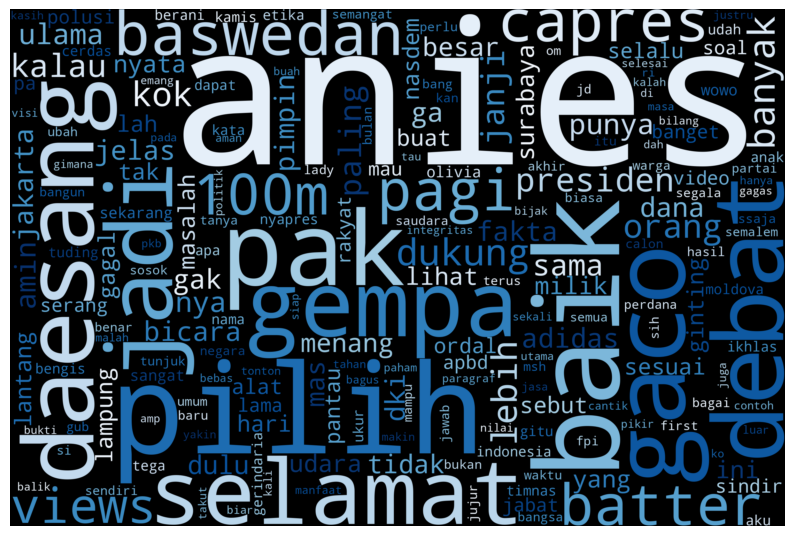

In [12]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Fungsi untuk memplot wordcloud
def plot_cloud(wordcloud):
    plt.figure(figsize=(10, 8))  # Atur ukuran plot
    plt.imshow(wordcloud, interpolation='bilinear')  # Tampilkan wordcloud
    plt.axis('off')  # Hilangkan sumbu

    # Simpan plot ke file
    plt.savefig('wordcloud_output_positif.png', bbox_inches='tight')  # Simpan dengan nama file

    plt.show()  # Tampilkan plot

# Filter data untuk hanya menyertakan tweet positif
positive_tweets = data[data['klasifikasi'] == 'Positif']

# Gabungkan semua kata dalam kolom 'full_text' dari tweet positif menjadi satu string
positive_words = ' '.join([tweets for tweets in positive_tweets['full_text']])

# Buat wordcloud untuk kata-kata positif
wordcloud = WordCloud(
    width=3000,
    height=2000,
    random_state=3,
    background_color='black',
    colormap='Blues_r',
    collocations=False,
    stopwords=STOPWORDS  # Hindari kata umum yang ada di STOPWORDS
).generate(positive_words)

# Plot wordcloud yang telah dibuat
plot_cloud(wordcloud)

# Wordcloud Klasifikasi Sentimen Negatif

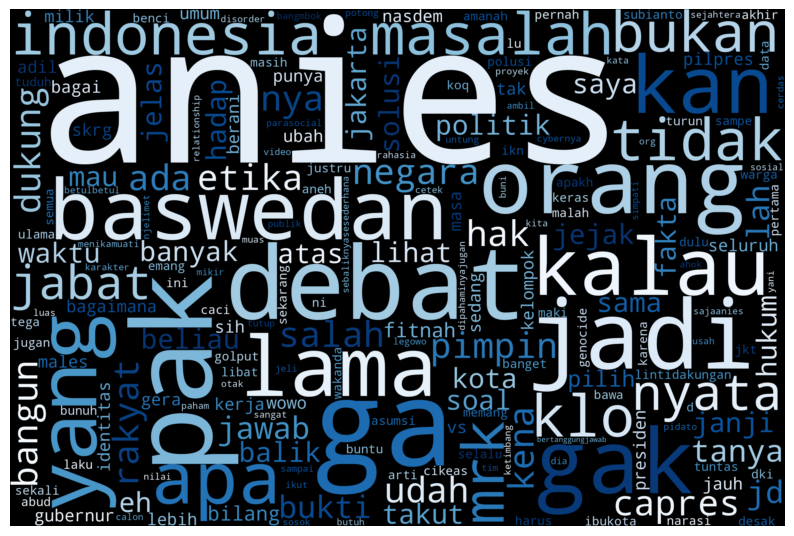

In [11]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Fungsi untuk memplot wordcloud
def plot_cloud(wordcloud):
    plt.figure(figsize=(10, 8))  # Atur ukuran plot
    plt.imshow(wordcloud, interpolation='bilinear')  # Tampilkan wordcloud
    plt.axis('off')  # Hilangkan sumbu

    # Simpan plot ke file
    plt.savefig('wordcloud_output_negatif.png', bbox_inches='tight')  # Simpan dengan nama file

    plt.show()  # Tampilkan plot

# Filter data untuk hanya menyertakan tweet positif
positive_tweets = data[data['klasifikasi'] == 'Negatif']

# Gabungkan semua kata dalam kolom 'full_text' dari tweet positif menjadi satu string
positive_words = ' '.join([tweets for tweets in positive_tweets['full_text']])

# Buat wordcloud untuk kata-kata positif
wordcloud = WordCloud(
    width=3000,
    height=2000,
    random_state=3,
    background_color='black',
    colormap='Blues_r',
    collocations=False,
    stopwords=STOPWORDS  # Hindari kata umum yang ada di STOPWORDS
).generate(positive_words)

# Plot wordcloud yang telah dibuat
plot_cloud(wordcloud)

# Wordcloud Klasifikasi Sentimen Netral

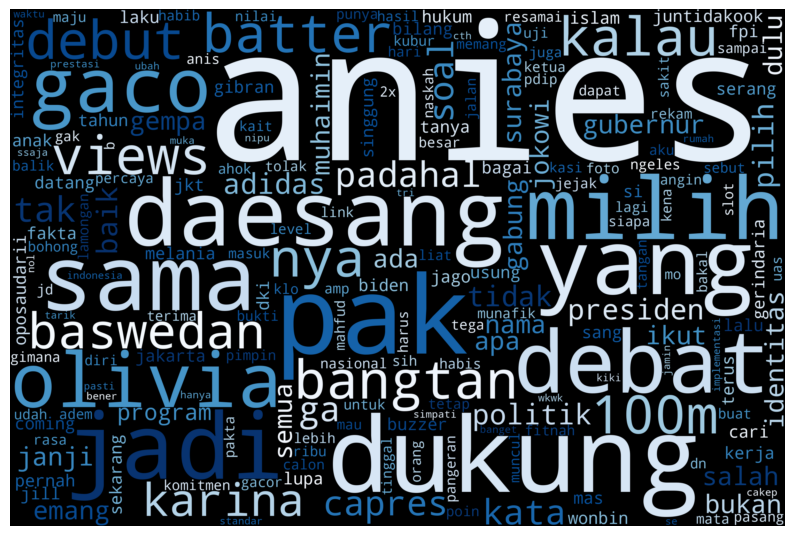

In [13]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Fungsi untuk memplot wordcloud
def plot_cloud(wordcloud):
    plt.figure(figsize=(10, 8))  # Atur ukuran plot
    plt.imshow(wordcloud, interpolation='bilinear')  # Tampilkan wordcloud
    plt.axis('off')  # Hilangkan sumbu

    # Simpan plot ke file
    plt.savefig('wordcloud_output_netral.png', bbox_inches='tight')  # Simpan dengan nama file

    plt.show()  # Tampilkan plot

# Filter data untuk hanya menyertakan tweet positif
positive_tweets = data[data['klasifikasi'] == 'Netral']

# Gabungkan semua kata dalam kolom 'full_text' dari tweet positif menjadi satu string
positive_words = ' '.join([tweets for tweets in positive_tweets['full_text']])

# Buat wordcloud untuk kata-kata positif
wordcloud = WordCloud(
    width=3000,
    height=2000,
    random_state=3,
    background_color='black',
    colormap='Blues_r',
    collocations=False,
    stopwords=STOPWORDS  # Hindari kata umum yang ada di STOPWORDS
).generate(positive_words)

# Plot wordcloud yang telah dibuat
plot_cloud(wordcloud)